In [3]:
%pip install seaborn

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
file_path = 'Earthquakes_database.csv'
df = pd.read_csv(file_path, parse_dates=['Date'], infer_datetime_format=True)
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1965-01-02 00:00:00,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1965-01-04 00:00:00,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1965-01-05 00:00:00,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1965-01-08 00:00:00,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1965-01-09 00:00:00,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [17]:
# Convert 'Date' column to datetime format with UTC and handle errors by coercion
earthquakes_df['Date'] = pd.to_datetime(earthquakes_df['Date'], errors='coerce', utc=True)

# Create new columns 'Year', 'Month', and 'Day' by extracting these components from 'Date'
earthquakes_df = earthquakes_df.assign(
    Year=earthquakes_df['Date'].dt.year,
    Month=earthquakes_df['Date'].dt.month,
    Day=earthquakes_df['Date'].dt.day
)

# List of columns to drop
columns_to_drop = ['Depth Error', 'Depth Seismic Stations', 'Magnitude Error',
    'Magnitude Seismic Stations', 'Horizontal Distance', 'Horizontal Error']

# Drop the specified columns and create a cleaned DataFrame
earthquakes_df_cleaned = earthquakes_df.drop(columns=columns_to_drop)

# Display the first few rows of the cleaned DataFrame
print(earthquakes_df_cleaned.head())

                       Date      Time  Latitude  Longitude        Type  Depth  \
0 1965-01-02 00:00:00+00:00  13:44:18    19.246    145.616  Earthquake  131.6   
1 1965-01-04 00:00:00+00:00  11:29:49     1.863    127.352  Earthquake   80.0   
2 1965-01-05 00:00:00+00:00  18:05:58   -20.579   -173.972  Earthquake   20.0   
3 1965-01-08 00:00:00+00:00  18:49:43   -59.076    -23.557  Earthquake   15.0   
4 1965-01-09 00:00:00+00:00  13:32:50    11.938    126.427  Earthquake   15.0   

   Magnitude Magnitude Type  Azimuthal Gap  Root Mean Square            ID  \
0        6.0             MW            NaN               NaN  ISCGEM860706   
1        5.8             MW            NaN               NaN  ISCGEM860737   
2        6.2             MW            NaN               NaN  ISCGEM860762   
3        5.8             MW            NaN               NaN  ISCGEM860856   
4        5.8             MW            NaN               NaN  ISCGEM860890   

   Source Location Source Magnitude Source  

In [18]:
# Define bins and labels for categorizing magnitudes
bins = [0, 4, 5, 6, 7, 8, 10]
categories = ['Minor', 'Light', 'Moderate', 'Strong', 'Major', 'Great']

# Categorize 'Magnitude' into defined bins and labels
earthquakes_df_cleaned['Magnitude Category'] = pd.cut(
    earthquakes_df_cleaned['Magnitude'],
    bins=bins,
    labels=categories
)

# Display the first few rows showing 'Magnitude' and 'Magnitude Category'
magnitude_category_df = earthquakes_df_cleaned.loc[:, ['Magnitude', 'Magnitude Category']]
print(magnitude_category_df.head())

   Magnitude Magnitude Category
0        6.0           Moderate
1        5.8           Moderate
2        6.2             Strong
3        5.8           Moderate
4        5.8           Moderate


In [19]:
# Melt the DataFrame to unpivot 'Magnitude' and 'Depth' columns
melted_df = pd.melt(
    earthquakes_df_cleaned,
    id_vars=['Date', 'Year', 'Month', 'Day'],
    value_vars=['Magnitude', 'Depth'],
    var_name='Measurement',
    value_name='Value'
)

# Display the first few rows of the melted DataFrame
print(melted_df.head())

                       Date  Year  Month  Day Measurement  Value
0 1965-01-02 00:00:00+00:00  1965      1    2   Magnitude    6.0
1 1965-01-04 00:00:00+00:00  1965      1    4   Magnitude    5.8
2 1965-01-05 00:00:00+00:00  1965      1    5   Magnitude    6.2
3 1965-01-08 00:00:00+00:00  1965      1    8   Magnitude    5.8
4 1965-01-09 00:00:00+00:00  1965      1    9   Magnitude    5.8


In [20]:
# Create a pivot table to summarize 'Magnitude' by 'Year' and 'Type'
pivot_table_df = earthquakes_df_cleaned.pivot_table(
    values='Magnitude',
    index='Year',
    columns='Type',
    aggfunc='mean'
)

# Display the first few rows of the pivot table
print(pivot_table_df.head())

Type  Earthquake  Explosion  Nuclear Explosion  Rock Burst
Year                                                      
1965    6.014159        NaN                NaN         NaN
1966    6.042275        NaN              5.620         NaN
1967    6.003922        NaN                NaN         NaN
1968    6.081848        NaN              5.575         NaN
1969    6.009938        NaN              5.820         NaN


<Figure size 1200x800 with 0 Axes>

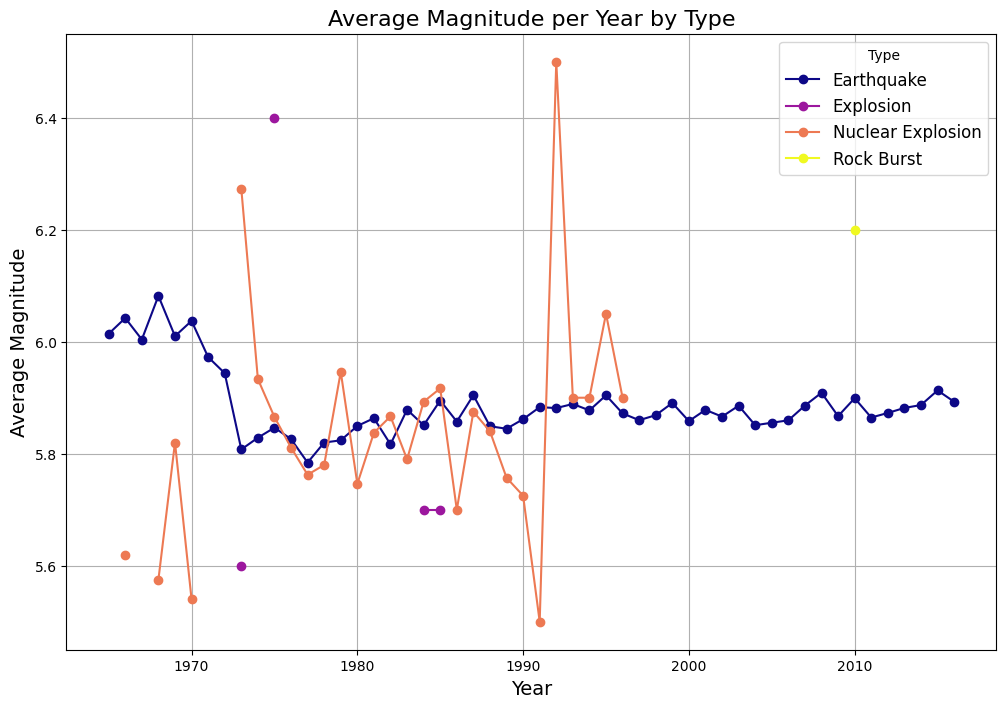

In [21]:
# Line chart of average magnitude per year
plt.figure(figsize=(12, 8))
pivot_table_df.plot(kind='line', figsize=(12, 8), marker='o', colormap='plasma')
plt.title('Average Magnitude per Year by Type', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Magnitude', fontsize=14)
plt.legend(title='Type', fontsize=12)
plt.grid(True)
plt.show()

<ipython-input-22-f5485e165df0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=earthquakes_df_cleaned, x='Magnitude Category', palette='coolwarm', order=categories)


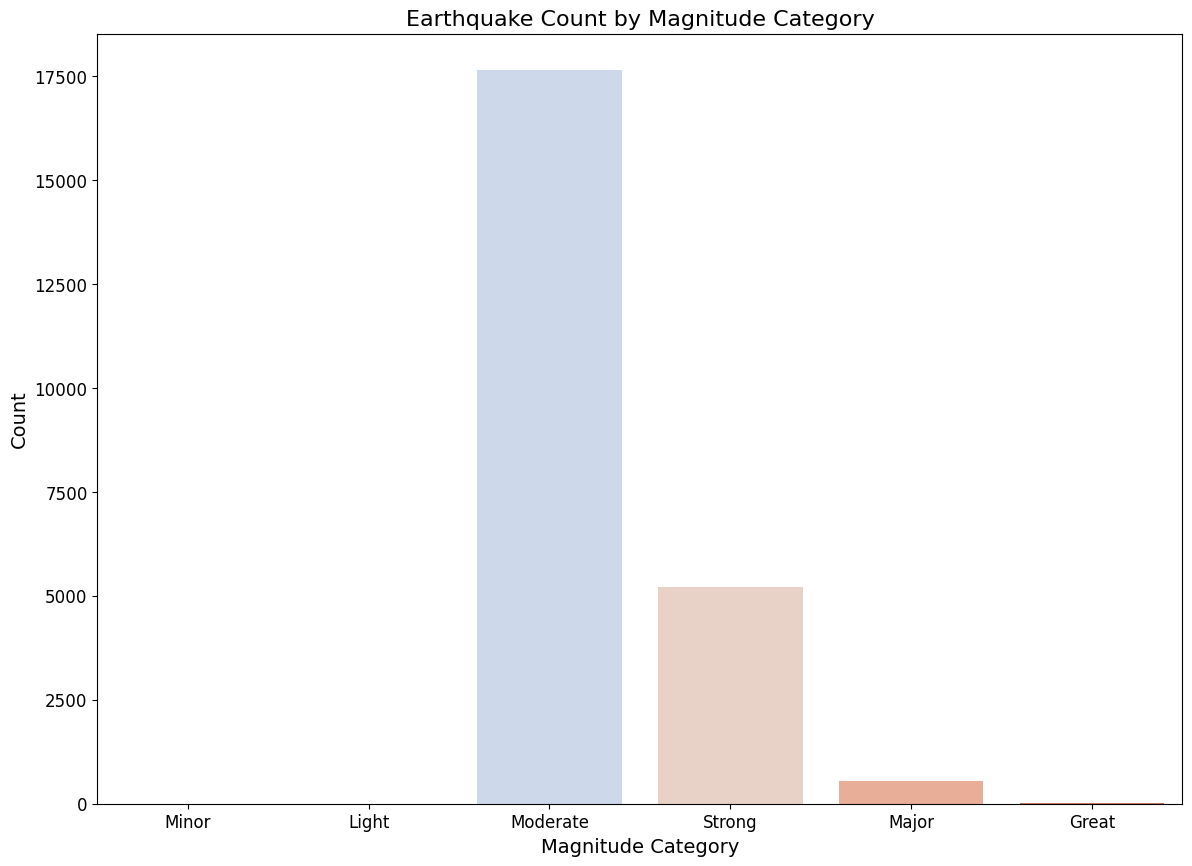

In [22]:
# Bar chart of earthquake count by magnitude category
plt.figure(figsize=(14, 10))
sns.countplot(data=earthquakes_df_cleaned, x='Magnitude Category', palette='coolwarm', order=categories)
plt.title('Earthquake Count by Magnitude Category', fontsize=16)
plt.xlabel('Magnitude Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

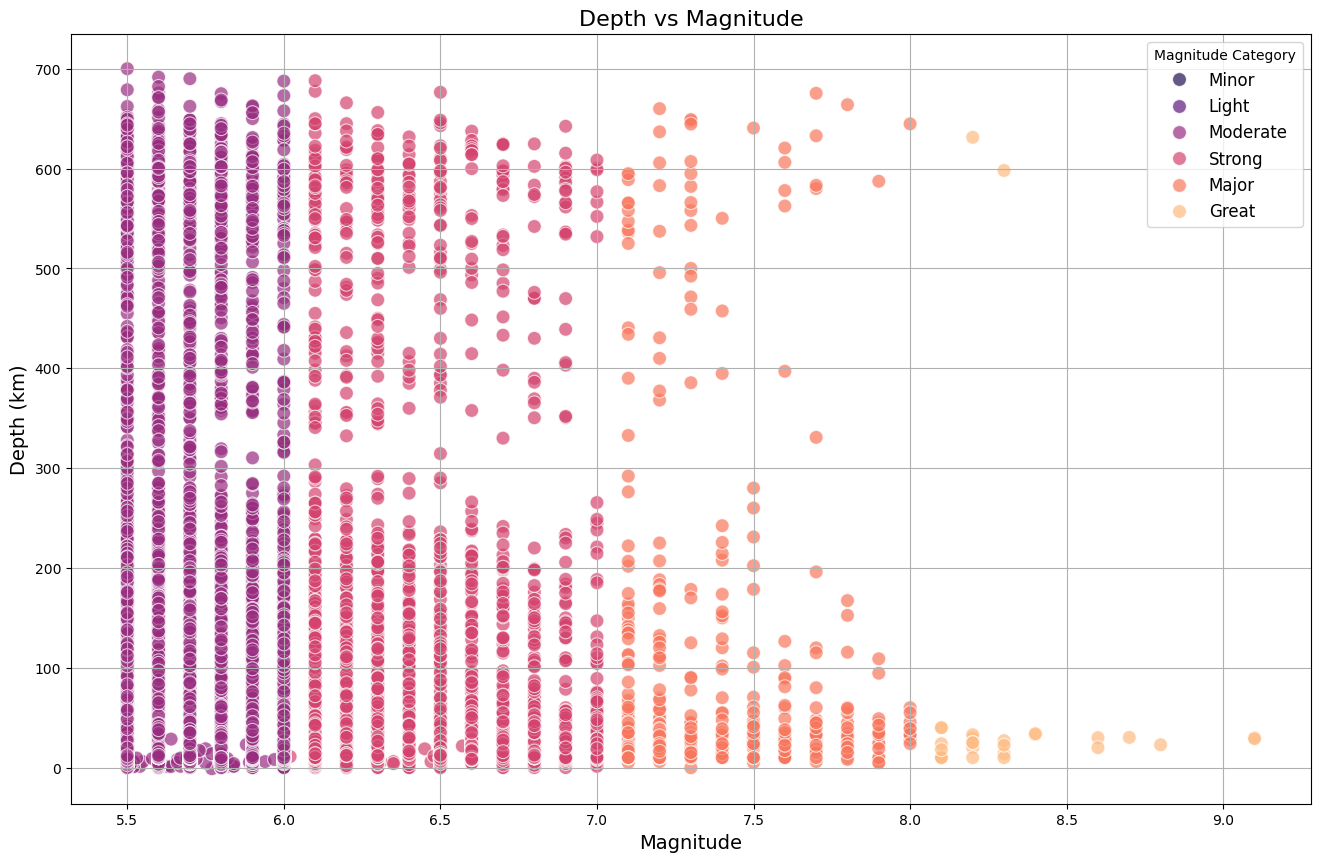

In [23]:
# Scatter chart of depth vs magnitude
plt.figure(figsize=(16, 10))
sns.scatterplot(data=earthquakes_df_cleaned, x='Magnitude', y='Depth', hue='Magnitude Category', palette='magma', s=100, edgecolor='w', alpha=0.7)
plt.title('Depth vs Magnitude', fontsize=16)
plt.xlabel('Magnitude', fontsize=14)
plt.ylabel('Depth (km)', fontsize=14)
plt.legend(title='Magnitude Category', fontsize=12)
plt.grid(True)
plt.show()

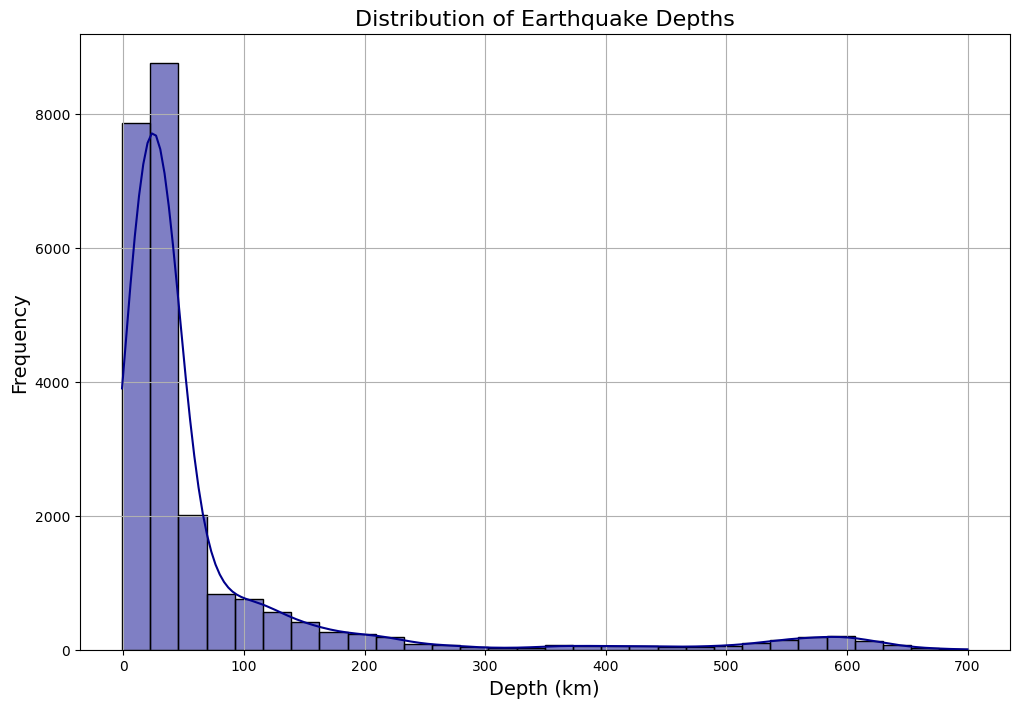

In [24]:
# Histogram of earthquake depths
plt.figure(figsize=(12, 8))
sns.histplot(data=earthquakes_df_cleaned, x='Depth', bins=30, kde=True, color='darkblue', edgecolor='black')
plt.title('Distribution of Earthquake Depths', fontsize=16)
plt.xlabel('Depth (km)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

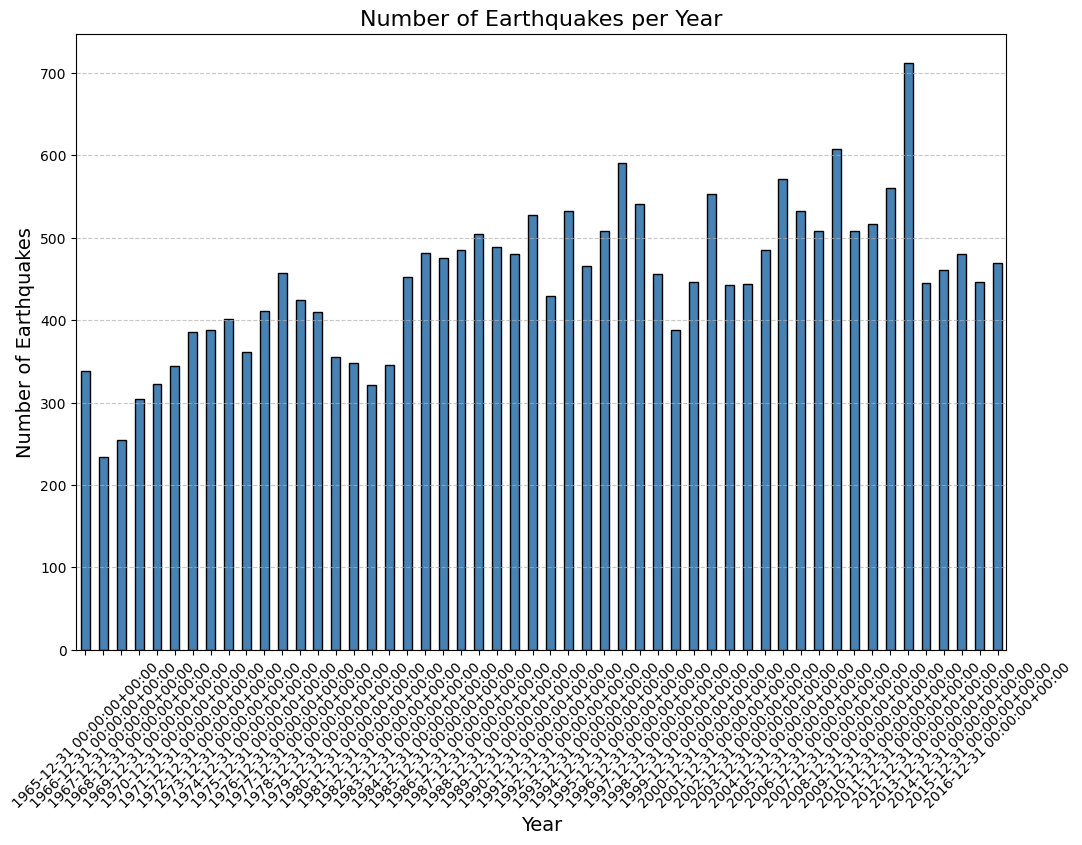

In [25]:
# Combine 'Date' and 'Time' into a single datetime column and handle errors
earthquakes_df['Datetime'] = pd.to_datetime(
    earthquakes_df.apply(lambda row: f"{row['Date']} {row['Time']}", axis=1),
    errors='coerce'
)

# Drop rows where 'Datetime' could not be parsed
earthquakes_df_cleaned = earthquakes_df.dropna(subset=['Datetime'])

# Set 'Datetime' as the index
earthquakes_df_cleaned.set_index('Datetime', inplace=True)

# Resample the data to find the number of earthquakes per year
earthquakes_per_year = earthquakes_df_cleaned.resample('Y').size()

# Plot the number of earthquakes per year
plt.figure(figsize=(12, 8))
earthquakes_per_year.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Number of Earthquakes per Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Earthquakes', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()